<a href="https://colab.research.google.com/github/bahram3000/google_colab/blob/main/test_nn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from my_func_pkg import exp_change

In [10]:
gold_df=yf.download(tickers='GC=F',interval='1d',period='max')

/tmp/ipython-input-1489891016.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gold_df=yf.download(tickers='GC=F',interval='1d',period='max')
[*********************100%***********************]  1 of 1 completed


In [12]:
closes=gold_df.loc[:"7-7-2025",'Close'].values[:,0]

In [13]:
ret_g=exp_change(closes)

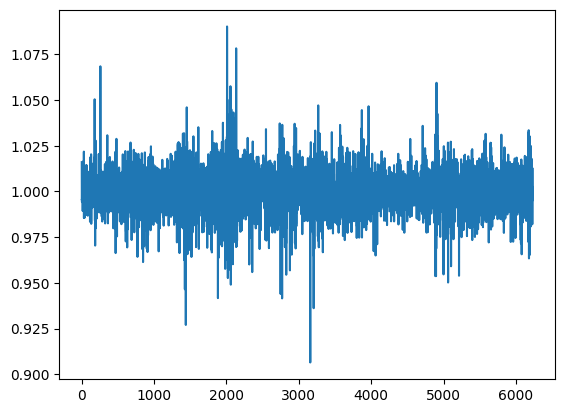

In [14]:
plt.plot(ret_g)
plt.show()

In [15]:
from my_func_pkg import build_data_for_auto_NN
from my_func_pkg import find_best_period_for_dependency

In [16]:
fbpfd=find_best_period_for_dependency(closes,overlay=False)

100%|██████████| 3113/3113 [13:55<00:00,  3.72it/s]


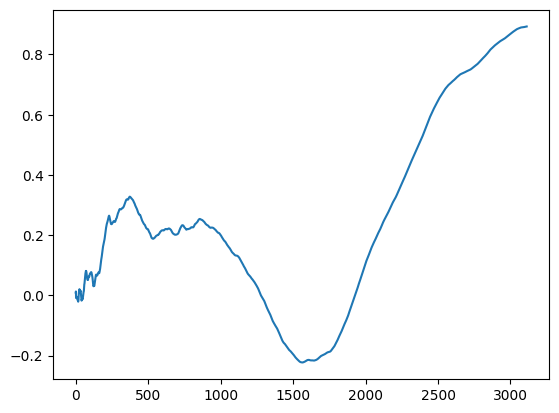

In [17]:
plt.plot(fbpfd)

In [18]:
from my_func_pkg import inflection_points

In [19]:
from my_func_pkg import find_pivot

In [20]:
fp=find_pivot(fbpfd)

In [21]:
ip=inflection_points(fbpfd)

In [22]:
from my_func_pkg import fix_num_key_index

In [23]:
fnki=fix_num_key_index(fbpfd,point_num=35,max_iter=100)

100%|██████████| 100/100 [00:00<00:00, 1327.12it/s]


In [24]:
min_ind=np.where(fbpfd[fp[0]]==np.min(fbpfd[fp[0]]))[0][0]

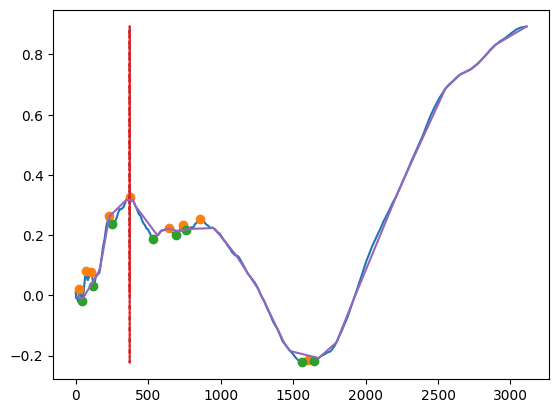

In [25]:
plt.plot(fbpfd)
plt.plot(fp[0],fbpfd[fp[0]],'o')
plt.plot(fp[1],fbpfd[fp[1]],'o')
plt.plot([372]*len(fbpfd),fbpfd,'--')
plt.plot(fnki,fbpfd[fnki])
plt.show()

In [26]:
fp[0]

array([  24,   70,  106,  230,  372,  642,  737,  855, 1606])

In [27]:
fnki

array([   8,   48,  157,  170,  232,  347,  393,  413,  563,  592,  642,
        713,  779,  950,  974, 1032, 1108, 1263, 1263, 1269, 1442, 1481,
       1676, 1799, 1916, 2215, 2277, 2551, 2651, 2711, 2731, 2783, 2847,
       2899, 3110])

In [28]:
from my_func_pkg import build_data_for_auto_NN

In [29]:
preve_len=372

In [30]:
x,y=build_data_for_auto_NN(ret_g,preve_len,30)

In [31]:
x.reshape(x.shape[0],x.shape[1],1).shape

(5831, 372, 1)

In [32]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses

In [33]:
model = models.Sequential([
    layers.LSTM(100,input_shape=(preve_len,1)),
    layers.Dense(60),
    layers.Dense(30)  # خروجی با همان ابعاد ورودی
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
model.compile(
    optimizer='adam',
    loss='mse'
)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [38]:
n_batch=20
epc=n_batch+1
batchsz=x.shape[0]//20

In [39]:
model.fit(x_train, y_train, epochs=epc, batch_size=batchsz)

Epoch 1/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - loss: 0.7598
Epoch 2/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - loss: 0.0346
Epoch 3/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - loss: 0.0054
Epoch 4/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - loss: 0.0011
Epoch 5/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - loss: 3.0064e-04
Epoch 6/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - loss: 1.4923e-04
Epoch 7/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - loss: 1.2641e-04
Epoch 8/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - loss: 1.2487e-04
Epoch 9/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - loss: 1.2270e-04
Epoch 10/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - loss: 1.2716e-04
Epoch 11/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - loss: 1.2560e-04
Epoch 12/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - loss: 1.2381e-04
Epoch 13/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - loss: 1.2334e-04
Epoch 14/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - loss: 1.2412e-04
Epoch 15/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s

In [40]:
model.evaluate(x_test,y_test)

37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 1.2699e-04


0.00012550325482152402

In [41]:
y_end=model.predict(x)

183/183 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step


In [42]:
def base_cenarios_by_given_future_dt(future_dt:np.ndarray,l_cenarios:int,base_dt:np.ndarray):
  b_cenarios=np.zeros((l_cenarios,))
  for j in range(l_cenarios):
      if j==0:
        b_cenarios[j]=base_dt[-1]*future_dt[0]
      else:
        b_cenarios[j]=b_cenarios[j-1]*future_dt[j]
  return b_cenarios

In [43]:
bc=base_cenarios_by_given_future_dt(y_end[-1],l_cenarios=30,base_dt=closes)

In [44]:
from my_func_pkg import most_frequency_cenarios

In [45]:
mfc=most_frequency_cenarios(closes,10,0.92,100,lcenarios=30)

100%|██████████| 100/100 [00:40<00:00,  2.44it/s]


In [46]:
close_future=gold_df.loc['7-7-2025':,'Close'].values[:,0]

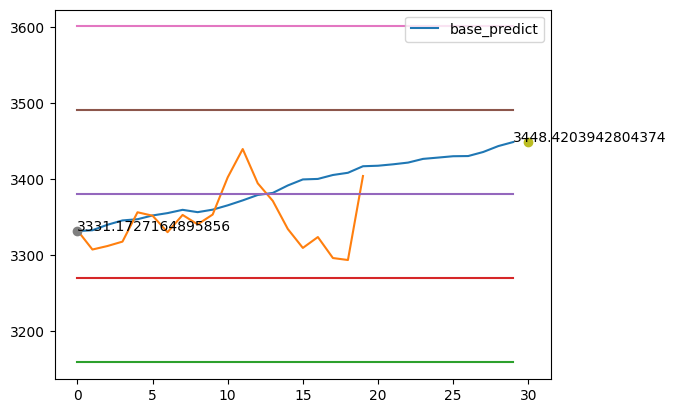

In [48]:
plt.plot(bc)
plt.plot(close_future)
plt.plot([mfc[0]]*30)
plt.plot([mfc[1]]*30)
plt.plot([mfc[2]]*30)
plt.plot([mfc[3]]*30)
plt.plot([mfc[4]]*30)
#plt.plot([mfc[5]]*30)
plt.legend(['base_predict'])
plt.plot([0],[bc[0]],'o')
plt.text(x=0,y=bc[0],s=f'{bc[0]}')
plt.plot([30],[bc[-1]],'o')
plt.text(x=29,y=bc[-1],s=f'{bc[-1]}')
plt.show()